A tunnel boring company uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is.

Dataset: https://www.kaggle.com/datasets/ahmedmohameddawoud/rock-density-xray

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset ML/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ['Signal', 'Density']

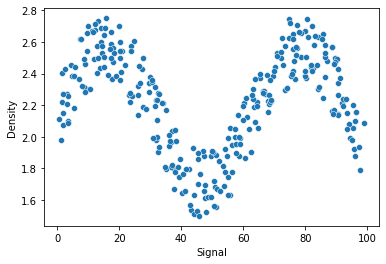

In [4]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [10]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [19]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [21]:
signal_range = np.arange(0,100)

In [23]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [24]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

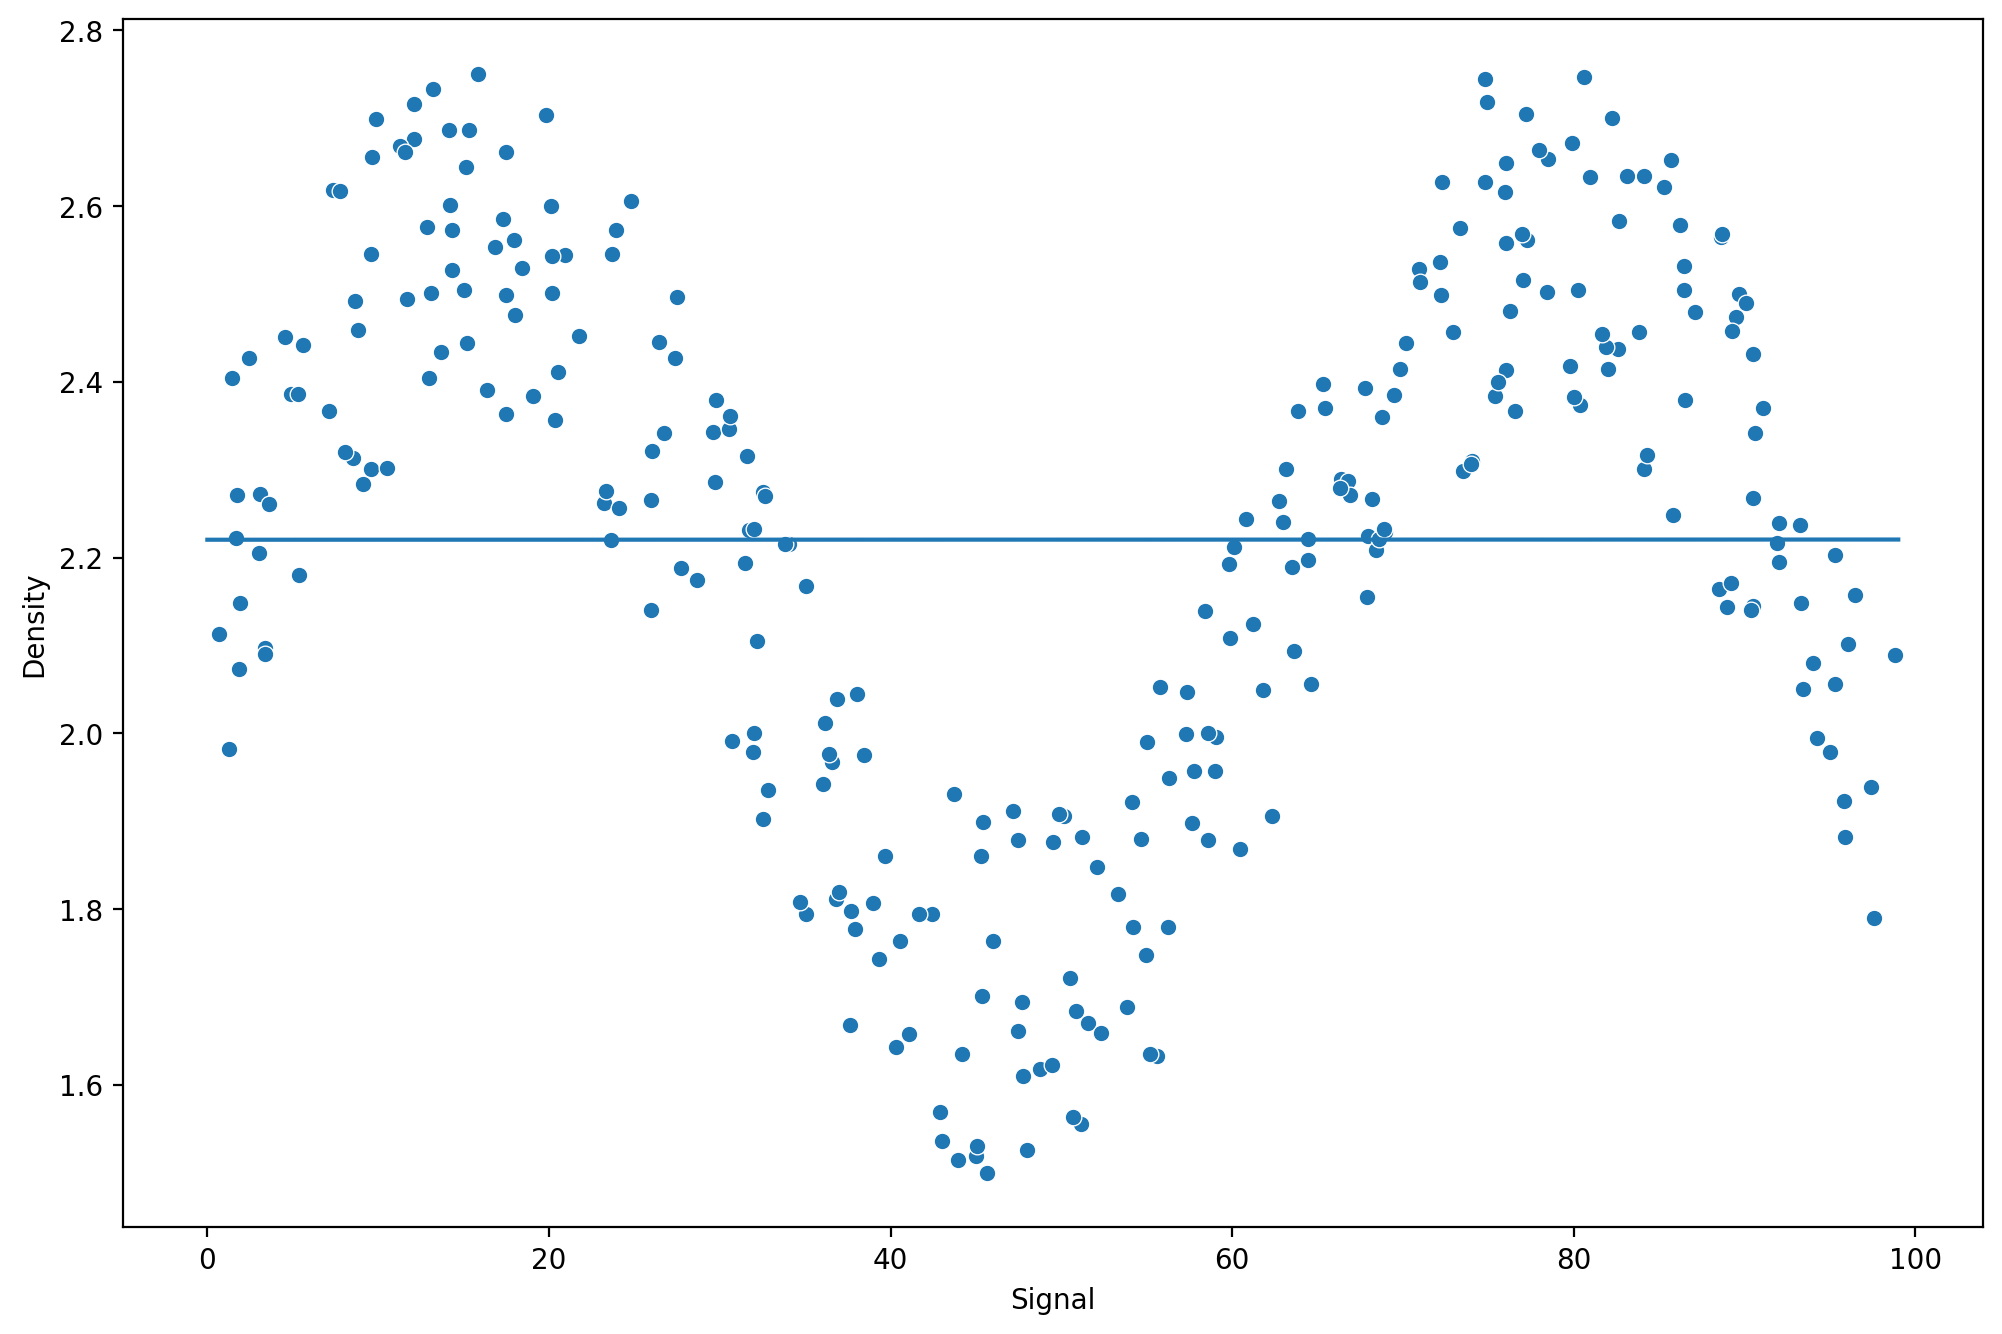

In [25]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = 'Signal', y = 'Density', data = df)
plt.plot(signal_range,signal_preds)

Linear Regression model just cannot fit this data

In [38]:
def run_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  rmse = mean_absolute_error(y_test,preds)
  mae = mean_absolute_error(y_test,preds)
  print(f'MAE: {mae}')
  print(f'RMSE: {rmse}')

  signal_range = np.arange(0,100)
  signal_preds = model.predict(signal_range.reshape(-1,1))

  plt.figure(figsize = (12,8), dpi = 200)
  sns.scatterplot(x = 'Signal', y = 'Density', data = df, color = 'black')

  plt.plot(signal_range,signal_preds)

Setting up a pipeline

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## Polynomial Regression

In [40]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())

MAE: 0.11969122389484065
RMSE: 0.11969122389484065


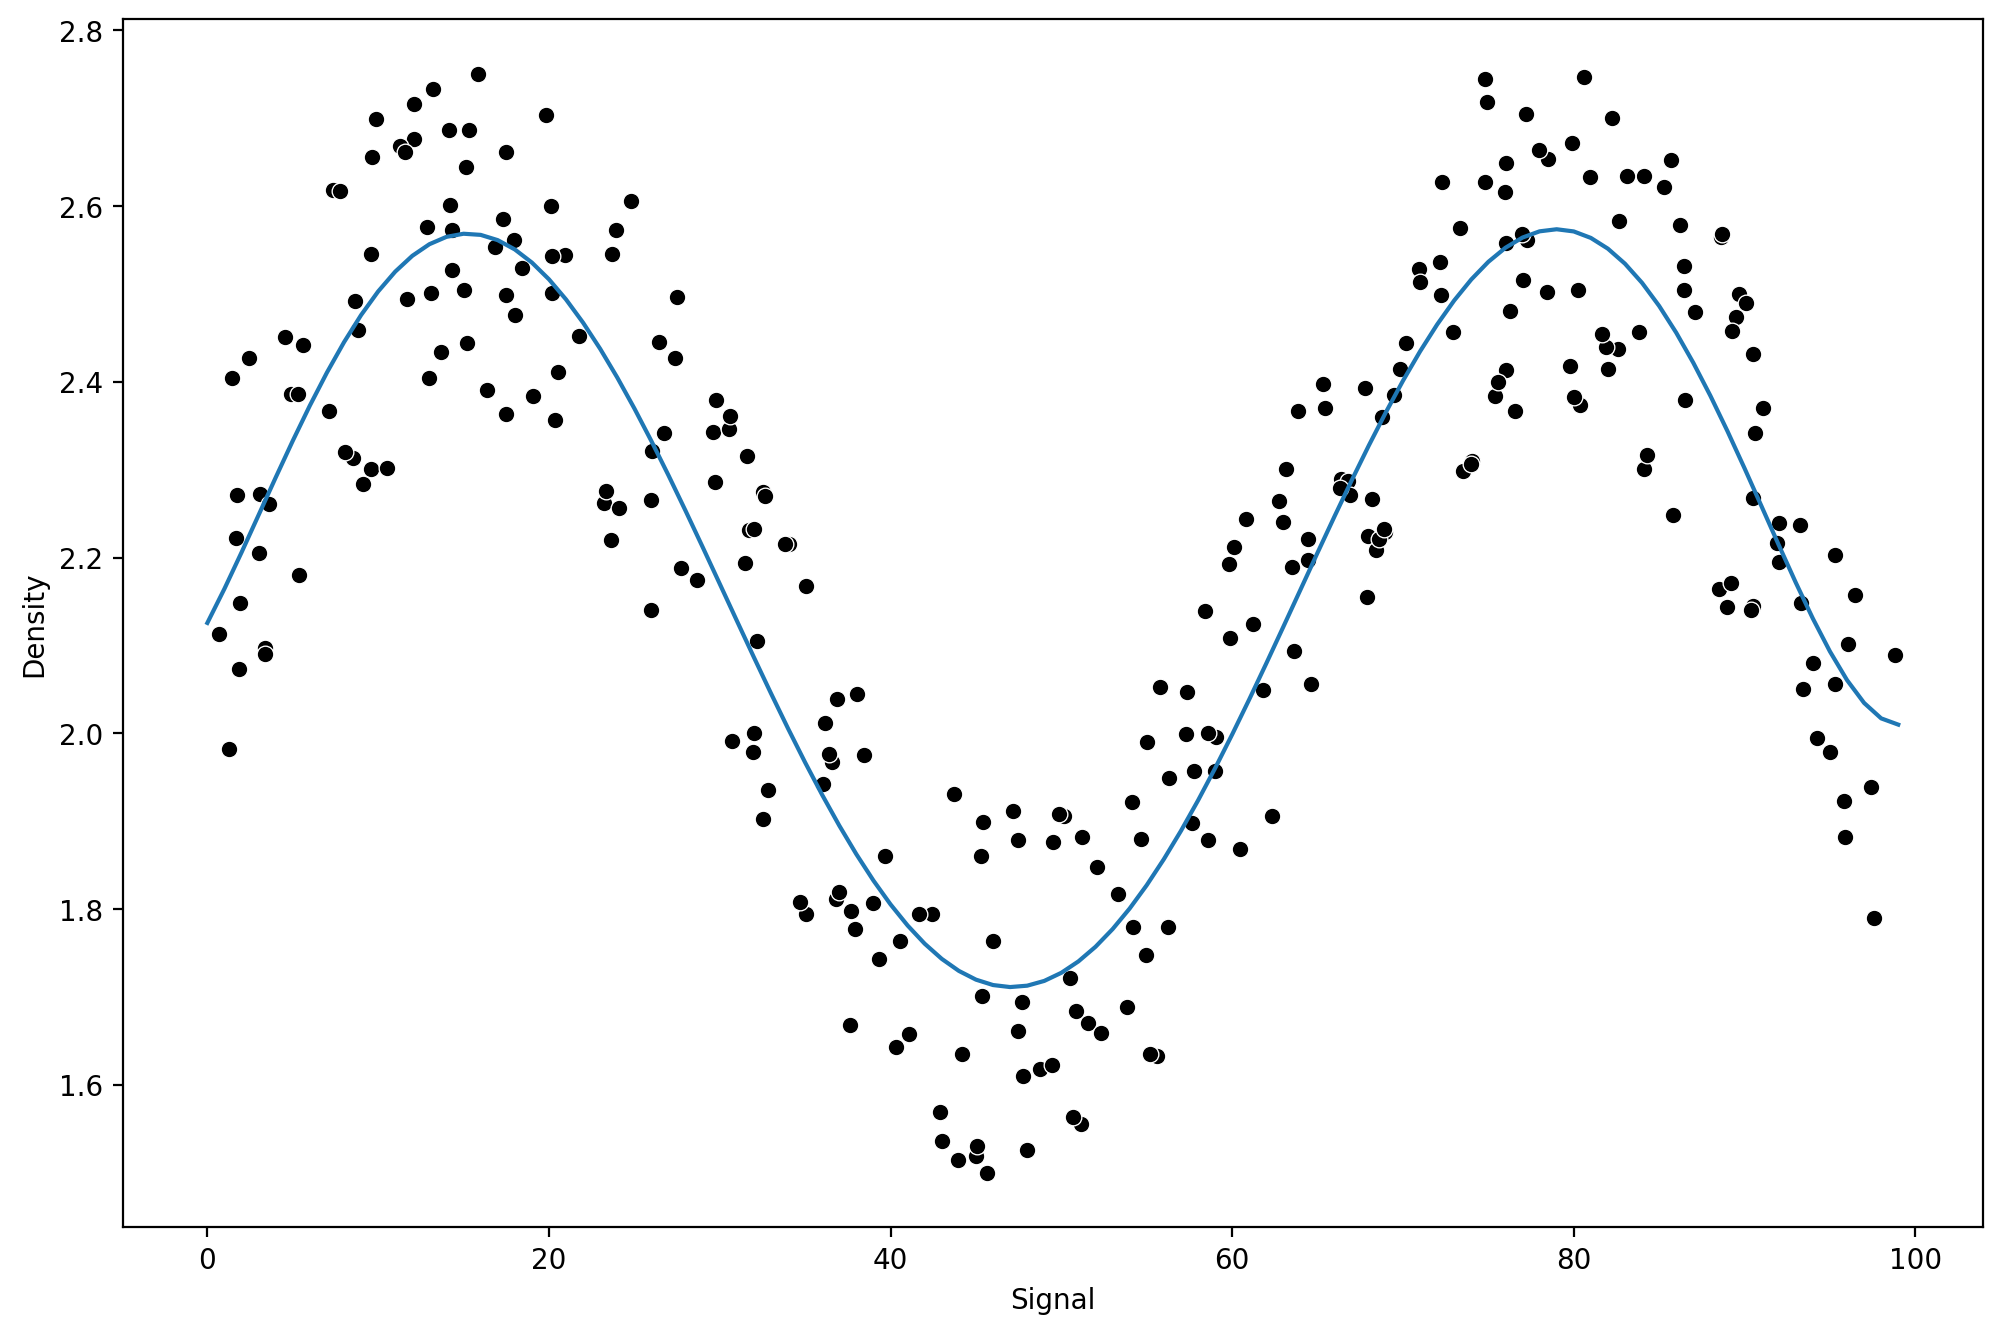

In [41]:
run_model(pipe,X_train,y_train,X_test,y_test)

## KNeighborsRegressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.11877297474442378
MAE: 0.12198383614100558
RMSE: 0.12198383614100558
MAE: 0.11635971693292672
RMSE: 0.11635971693292672
MAE: 0.13363165935705318
RMSE: 0.13363165935705318


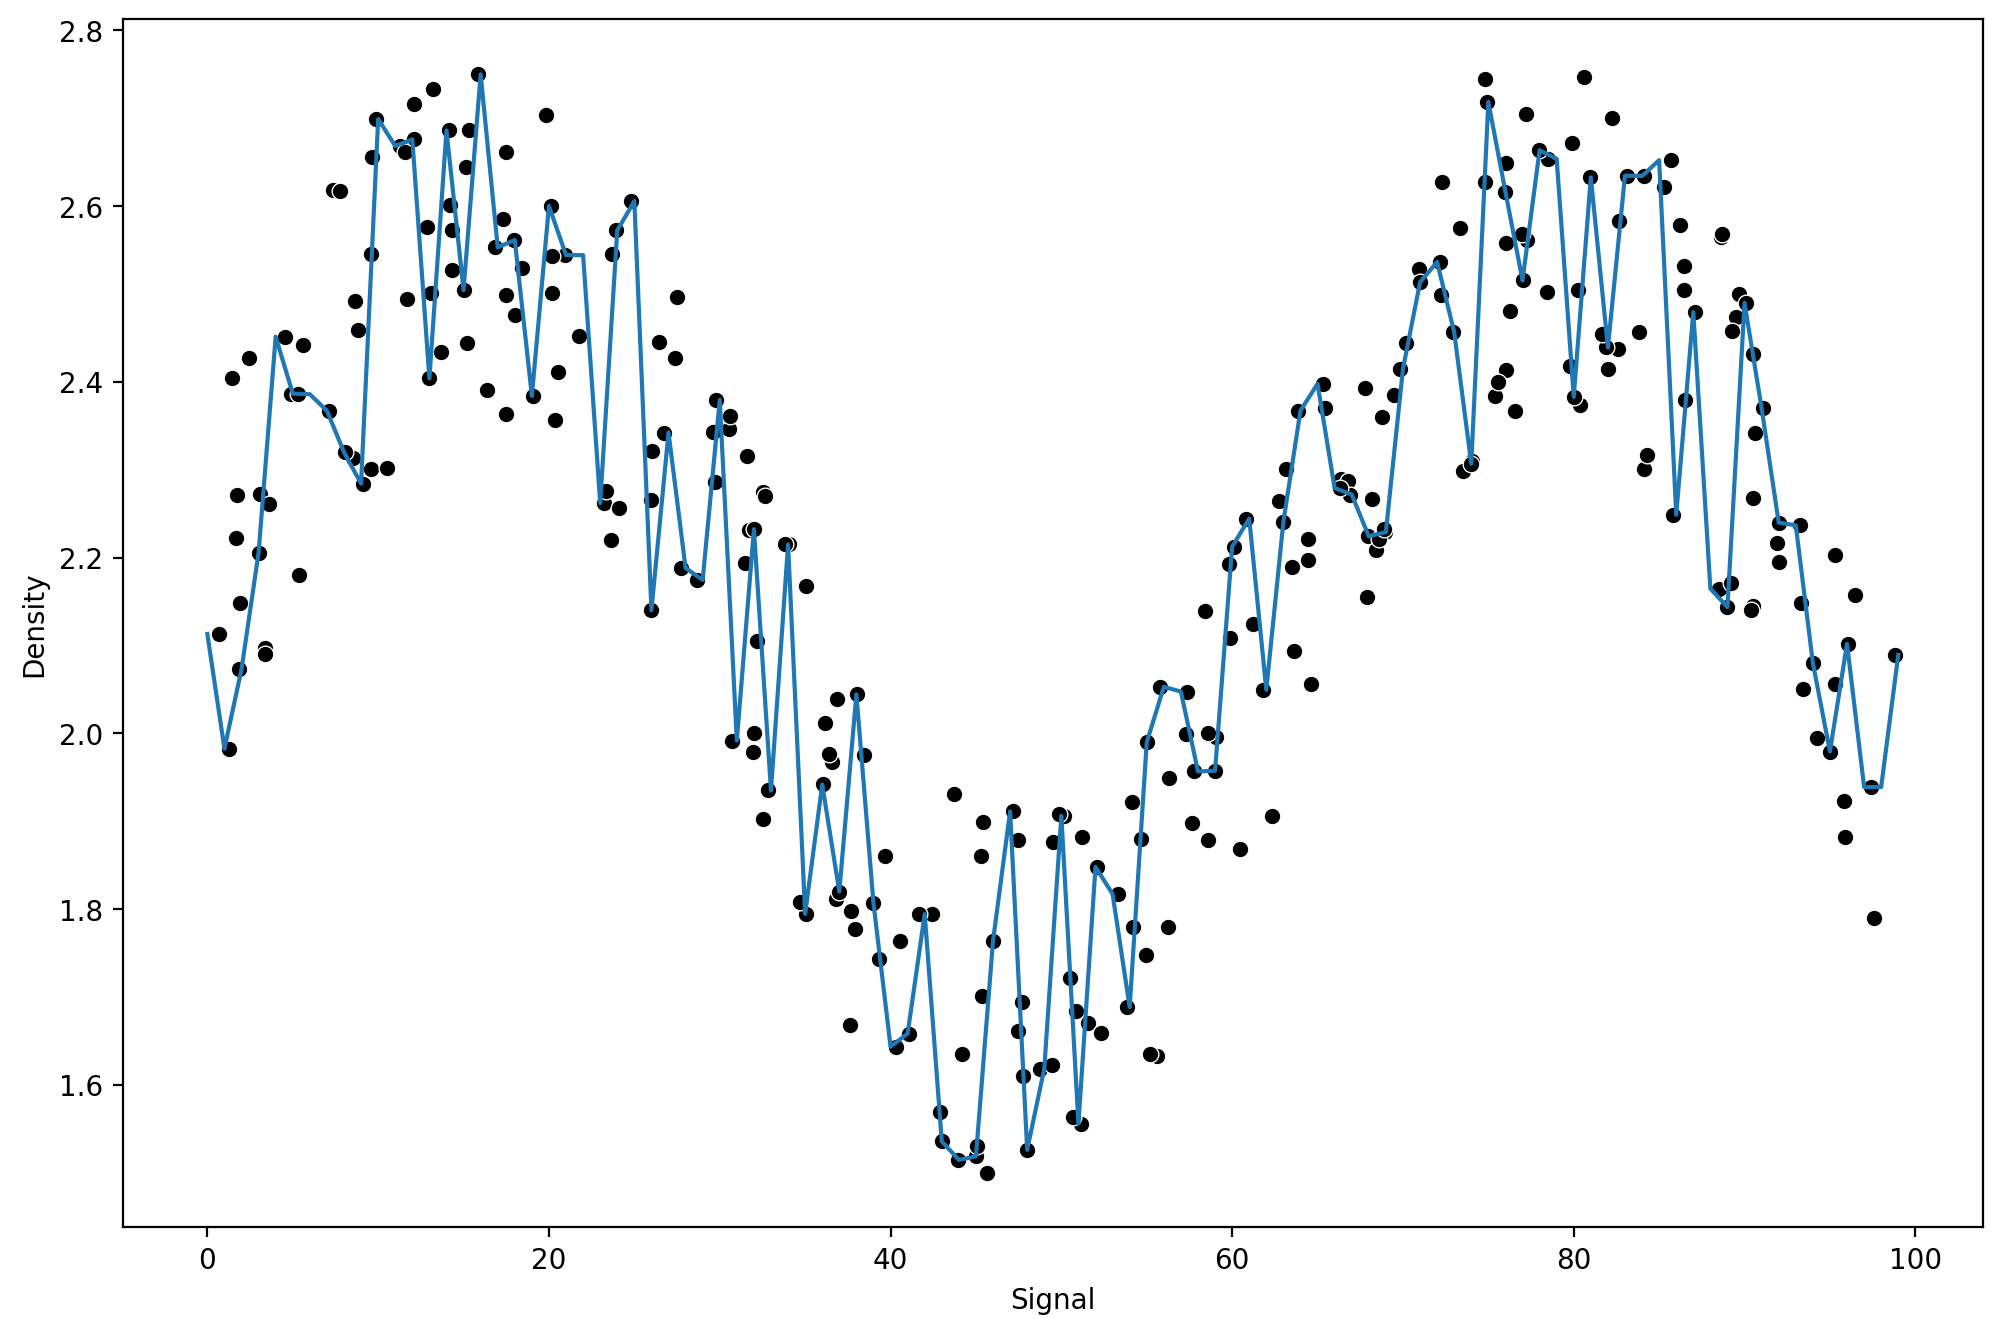

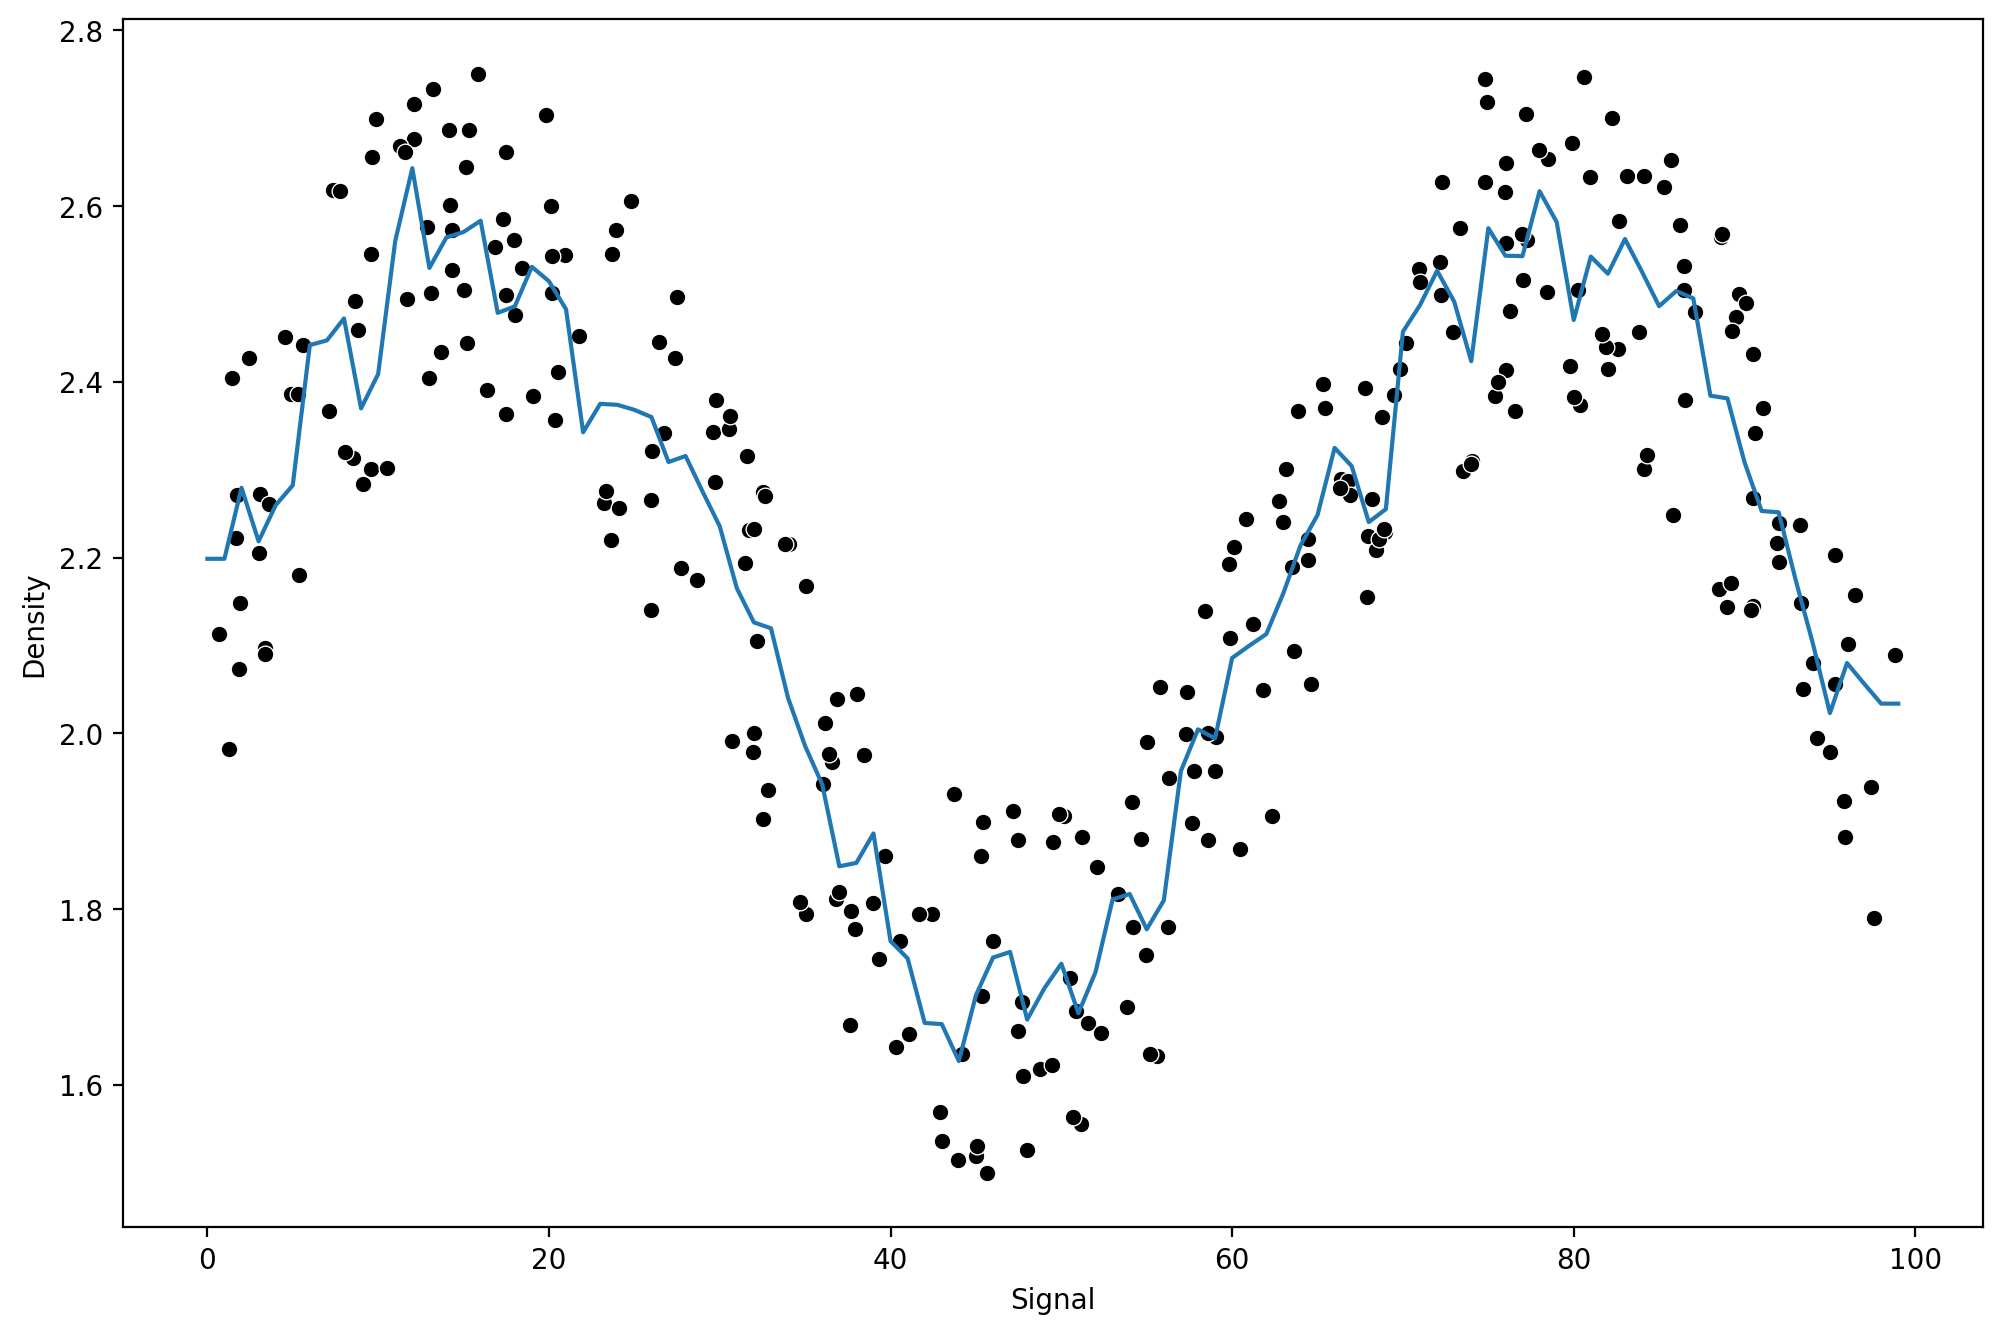

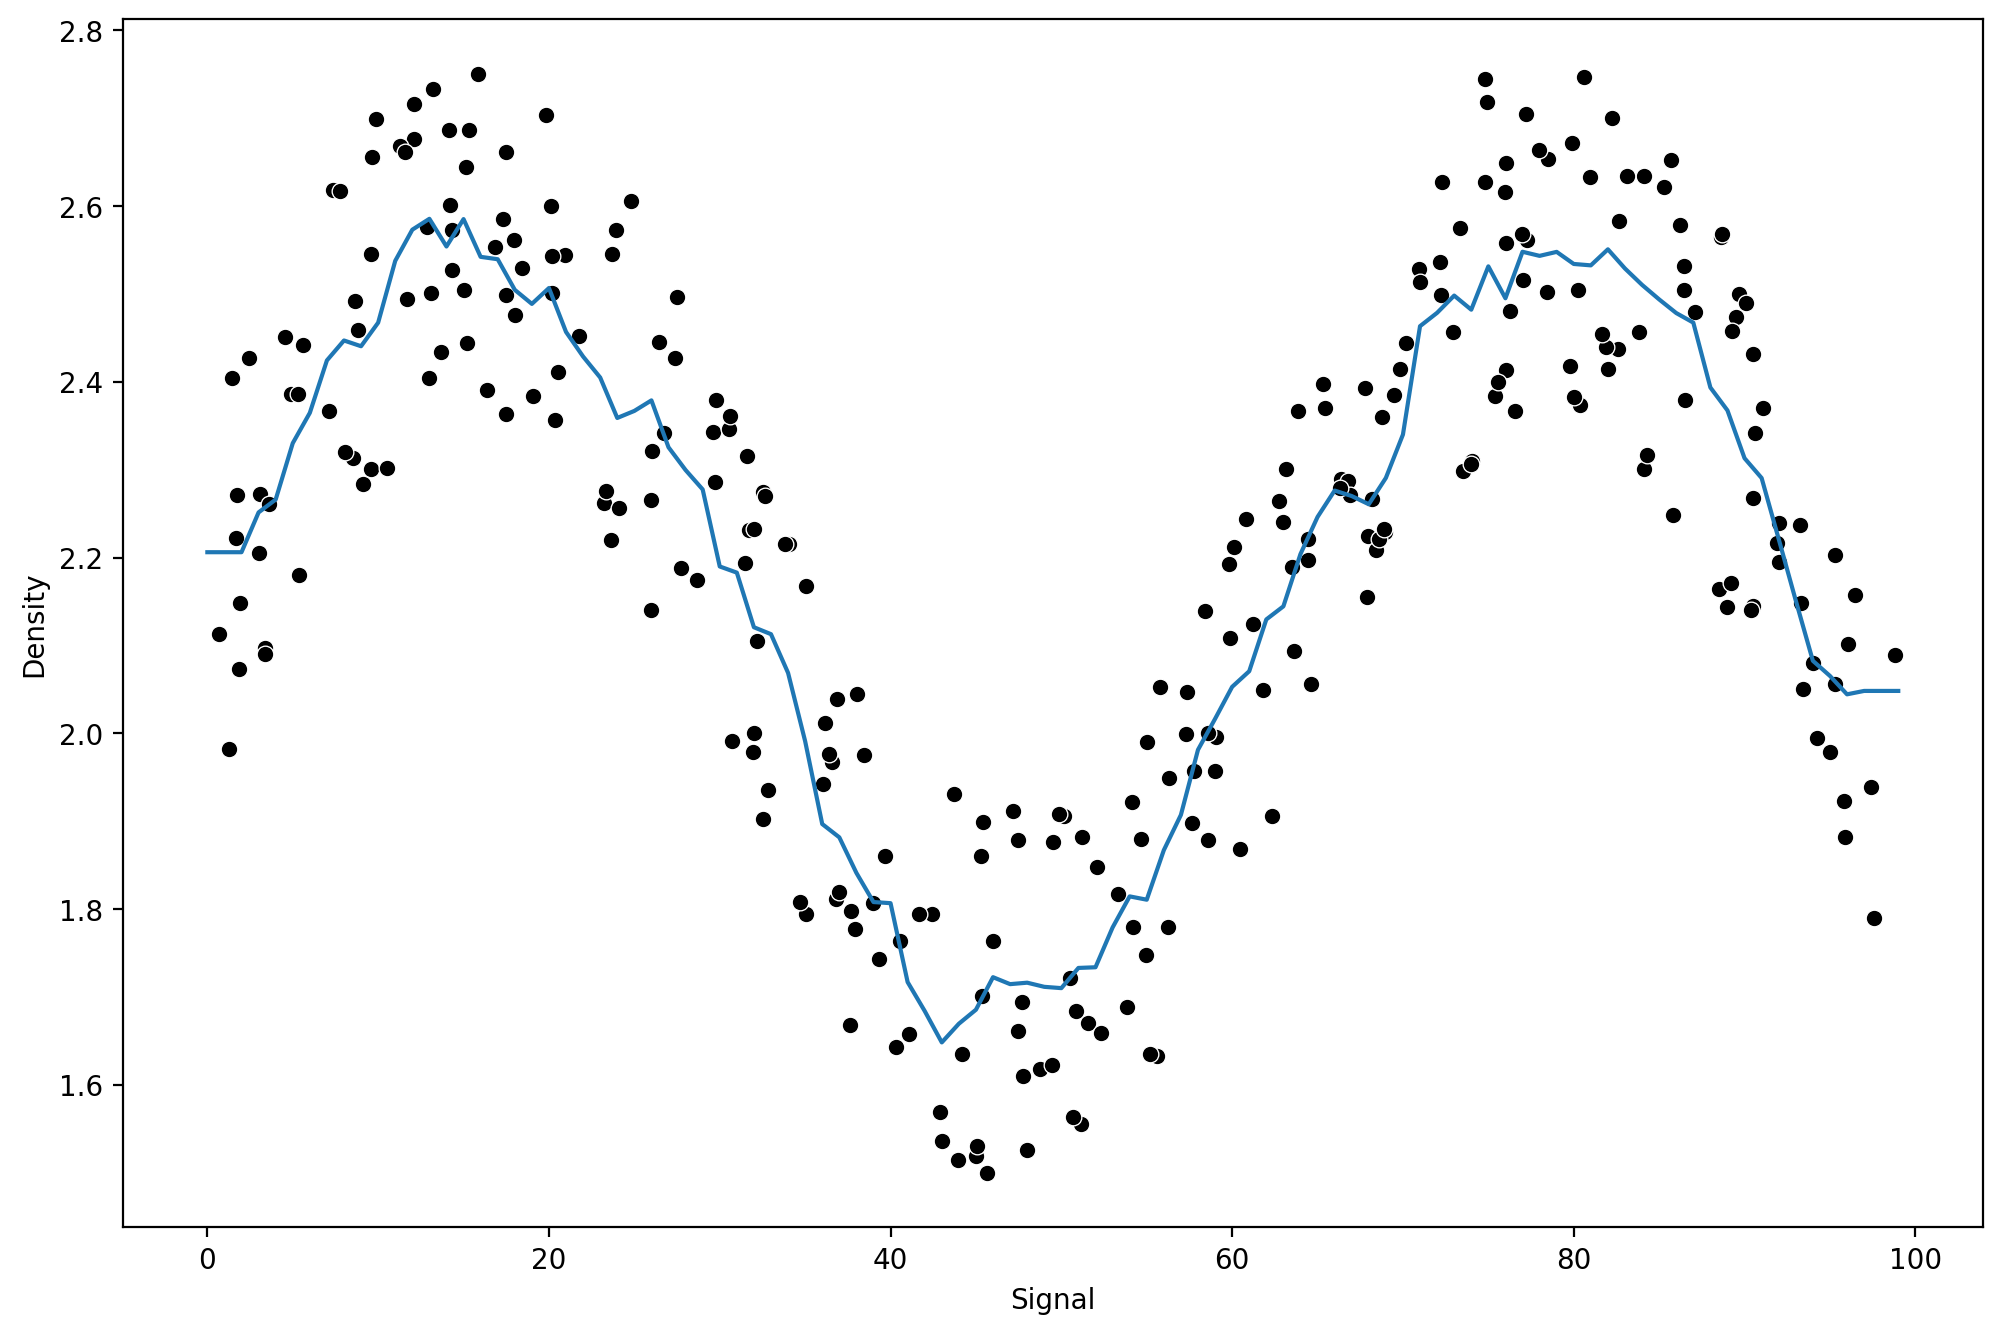

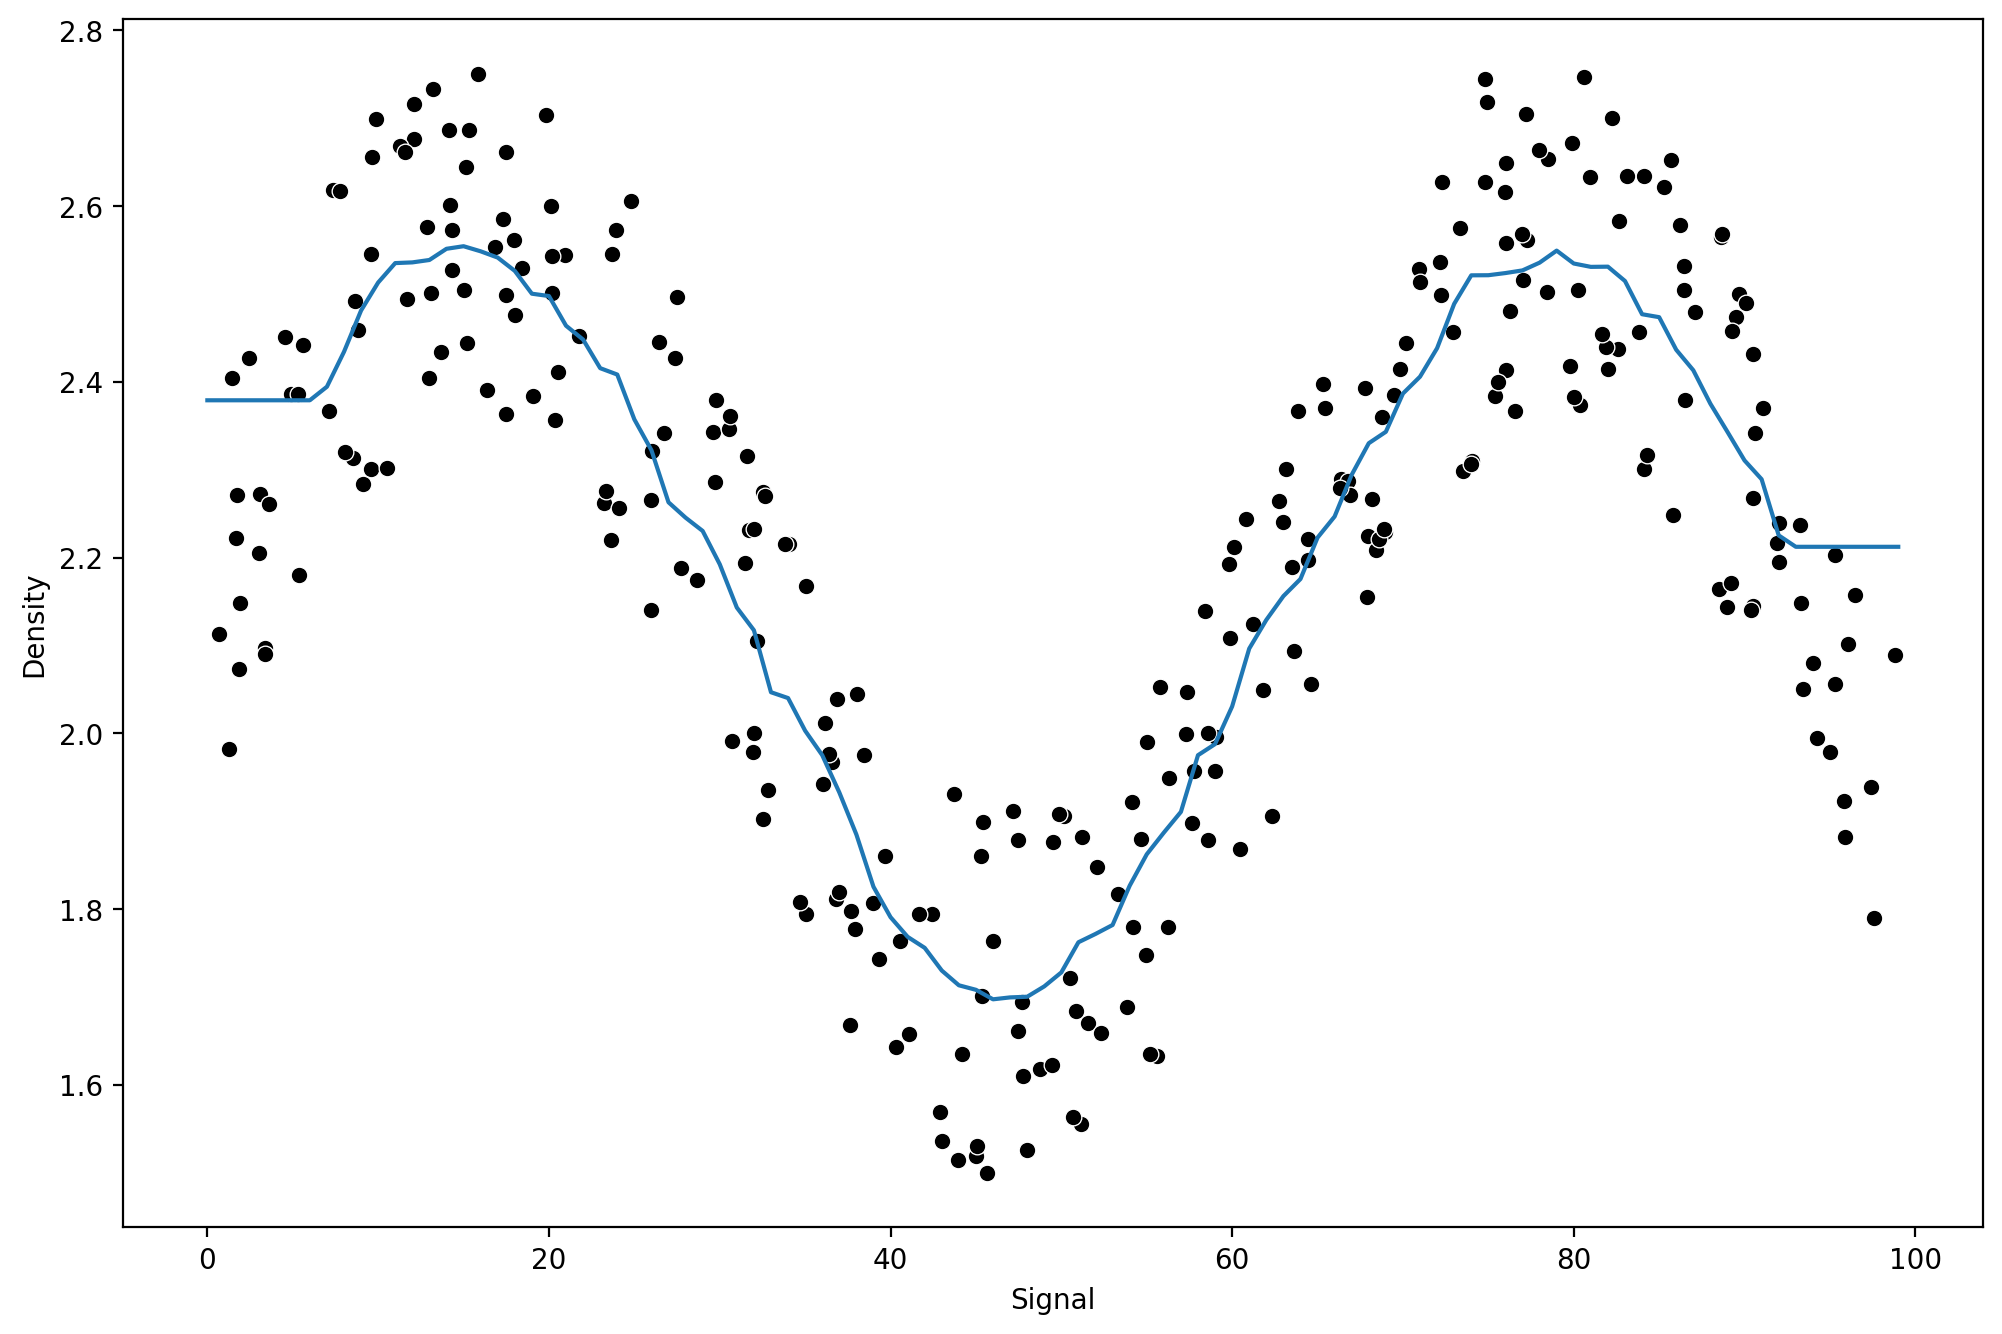

In [49]:
k_values = [1,5,10,30]
for n in k_values:
  model = KNeighborsRegressor(n_neighbors = n)
  run_model(model, X_train, y_train, X_test,y_test)

## DecisionTree Regressor

MAE: 0.11877297474442378
RMSE: 0.11877297474442378


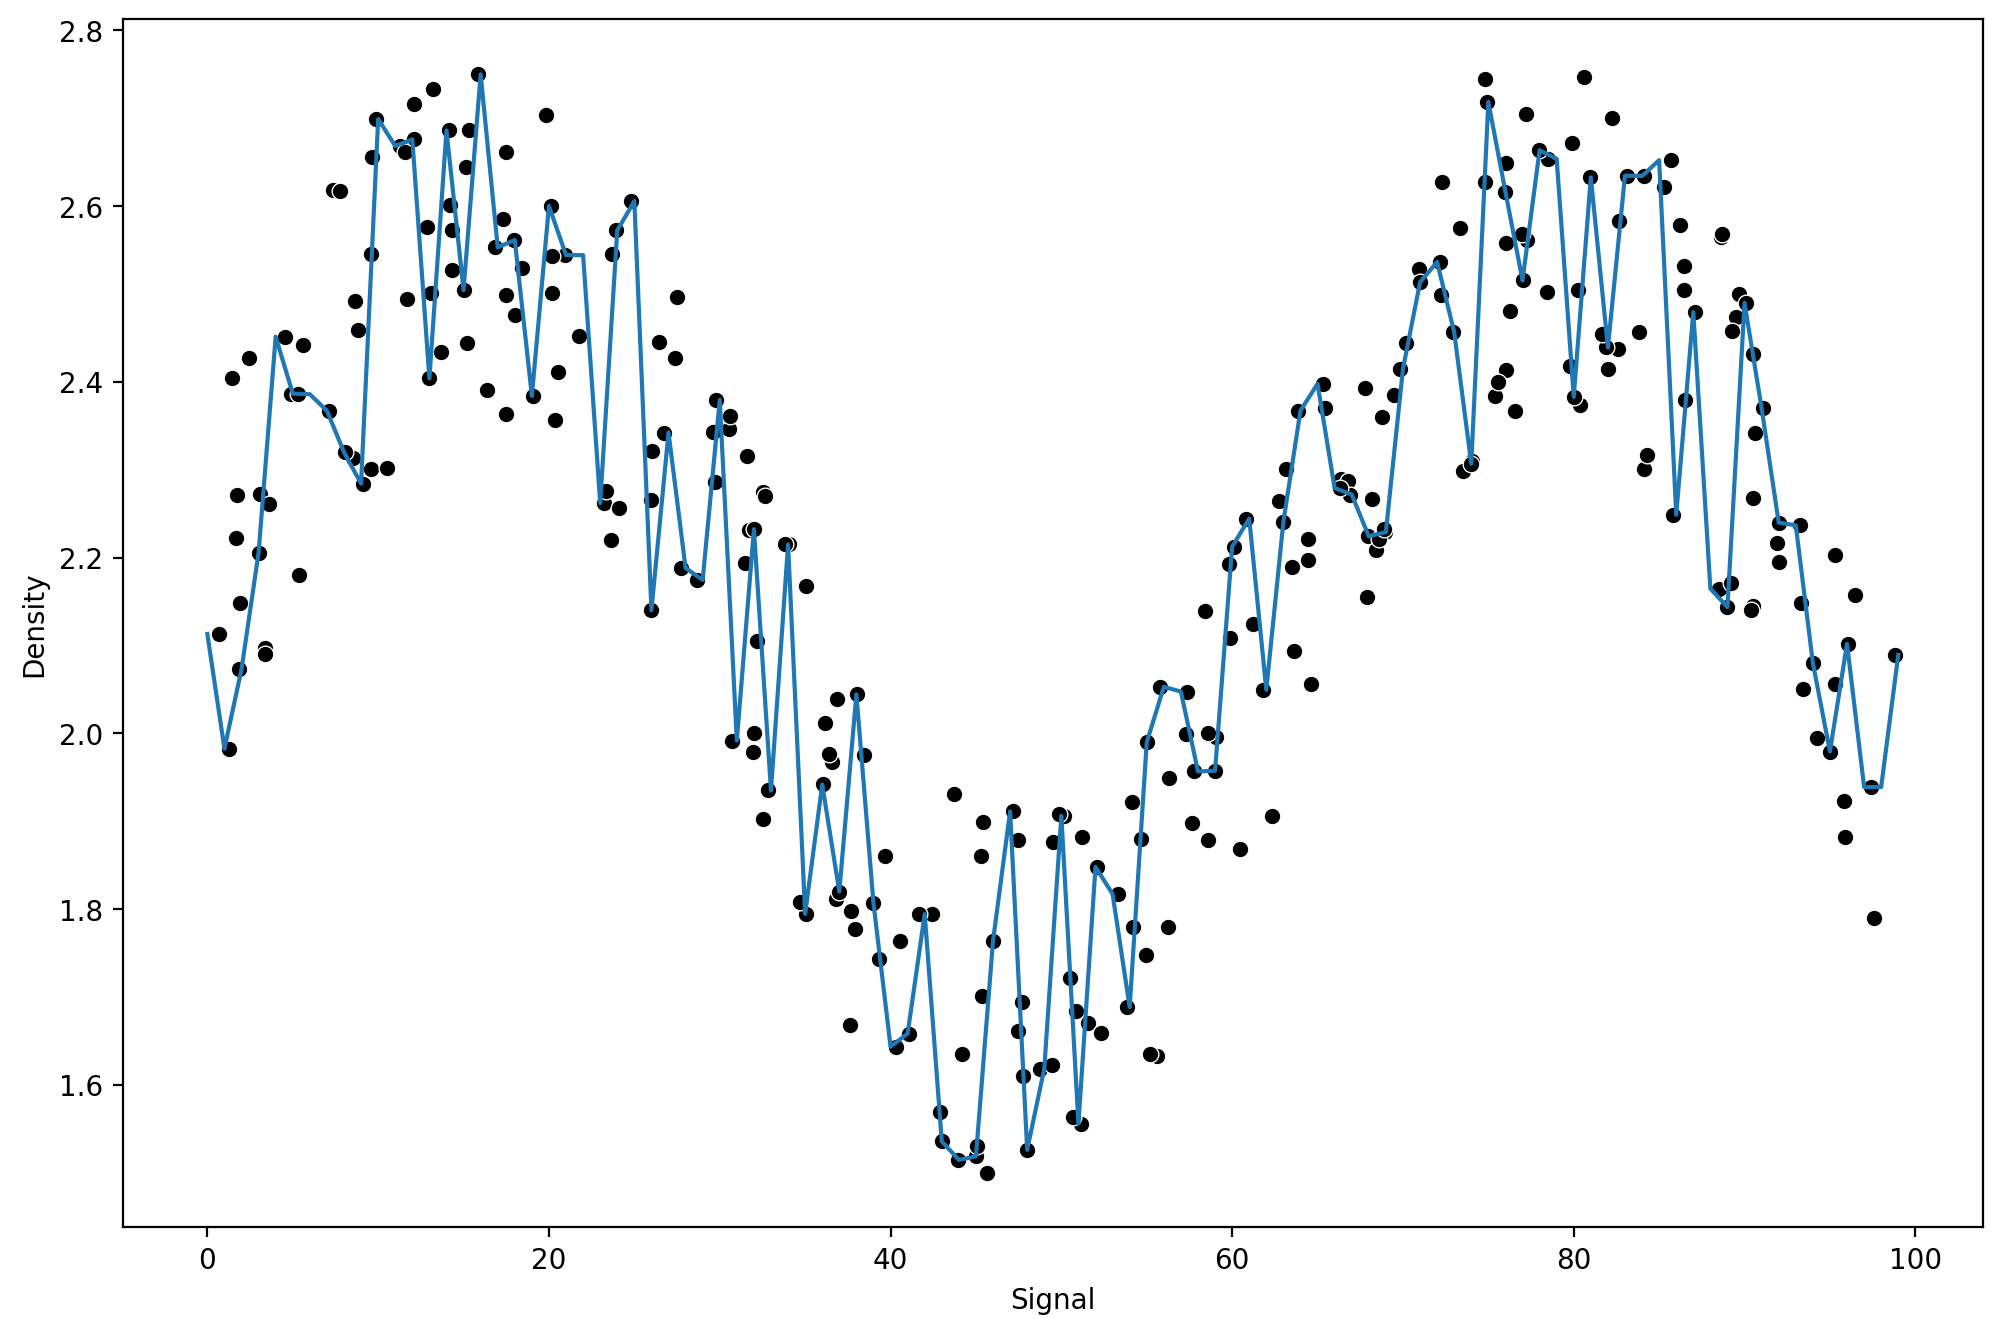

In [50]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test,y_test)

## SVR

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [52]:
svr = SVR()
param_grid = {'C' : [0.01, 0.1, 1, 5, 10 ,100,1000],
              'gamma' : ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

MAE: 0.10854210121345335
RMSE: 0.10854210121345335


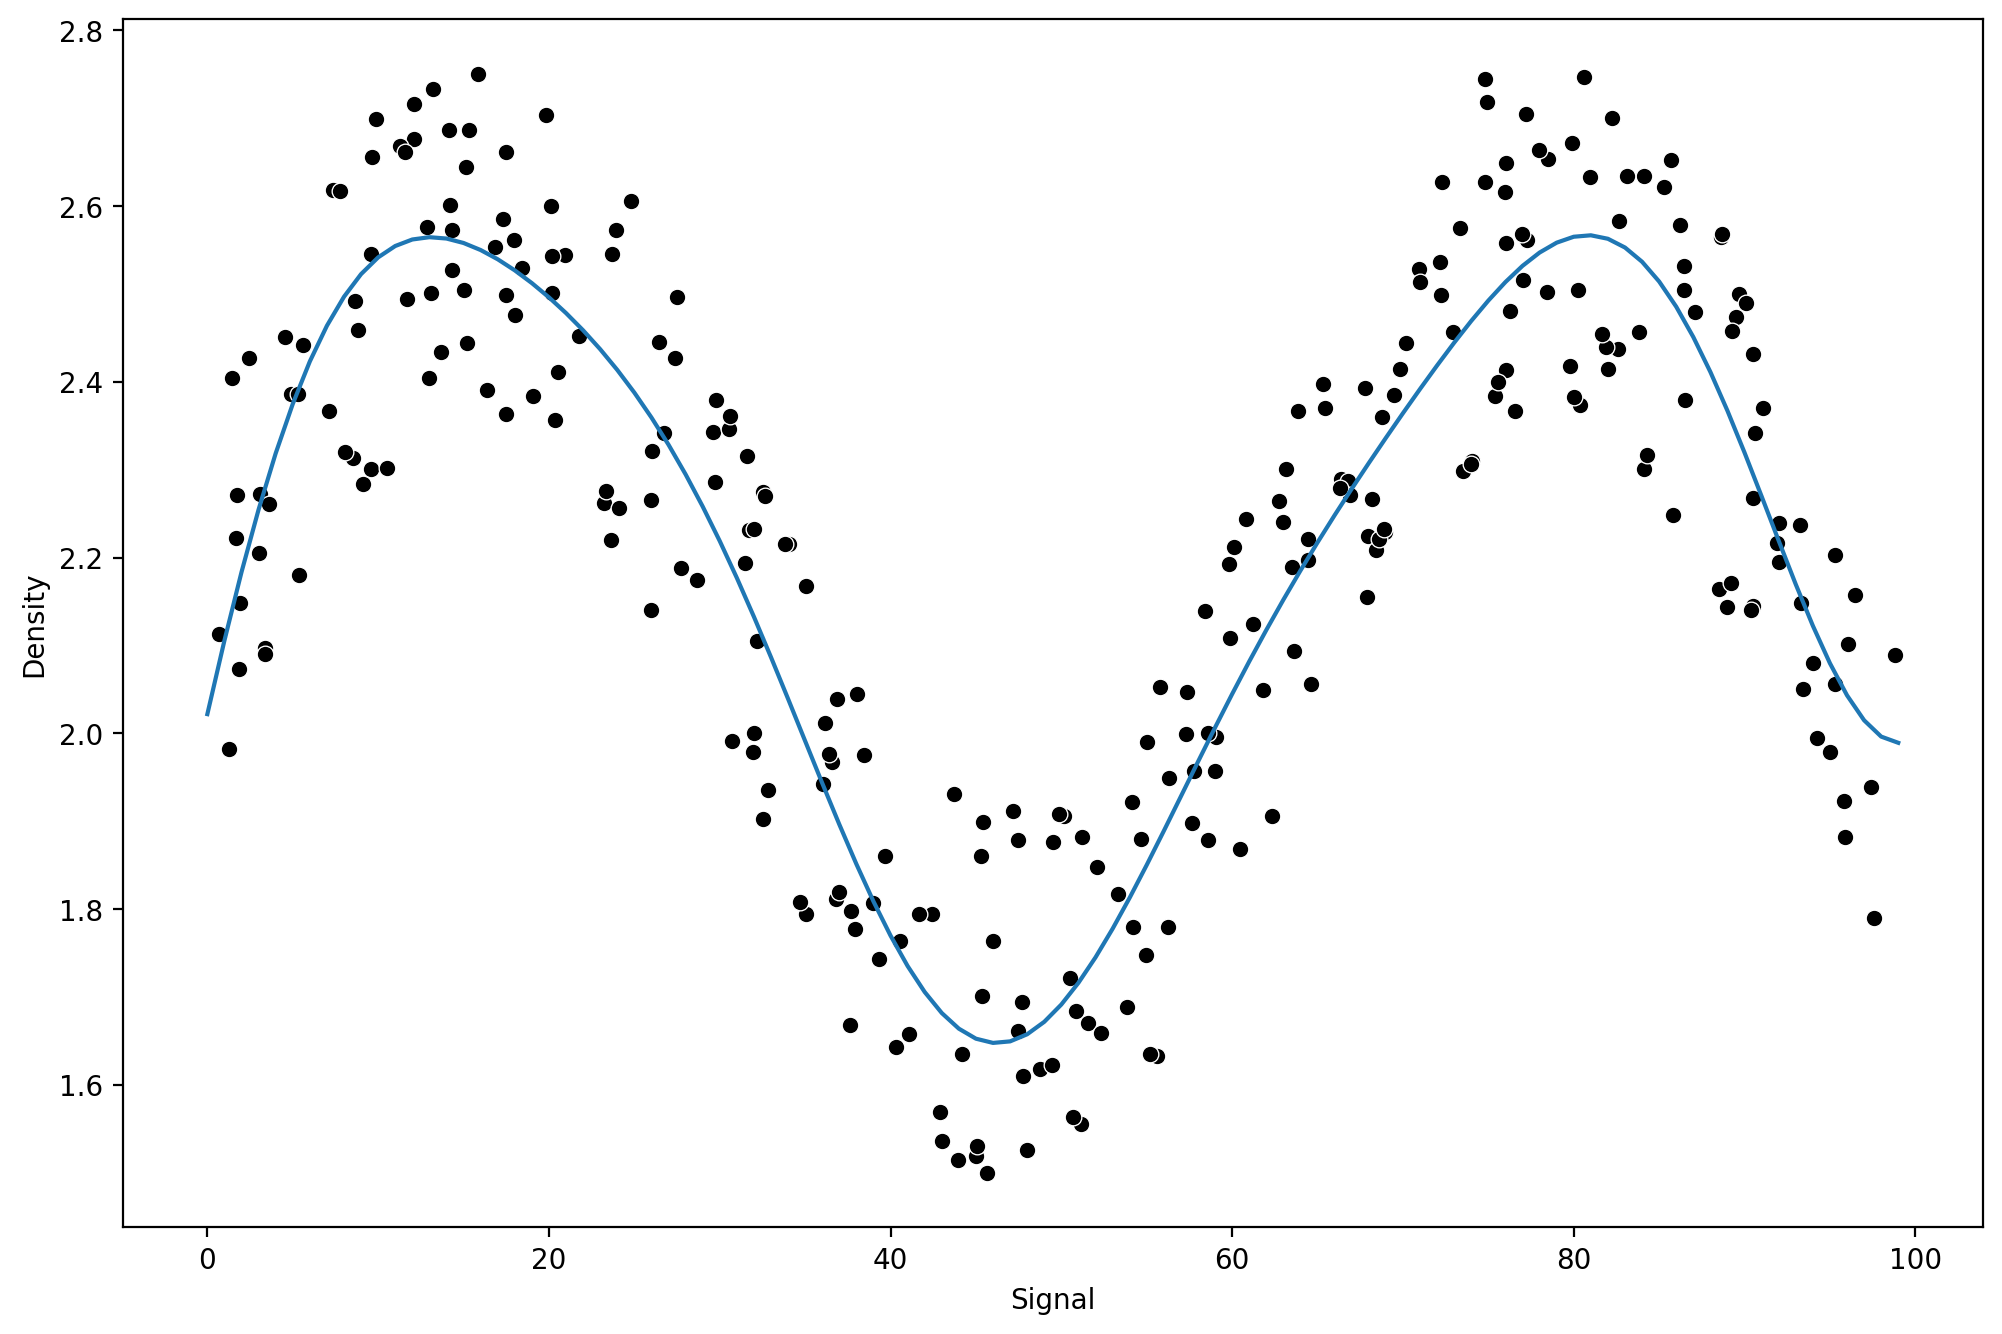

In [53]:
run_model(grid, X_train, y_train, X_test, y_test)

## Random Forest Regressor

MAE: 0.12220028793530321
RMSE: 0.12220028793530321


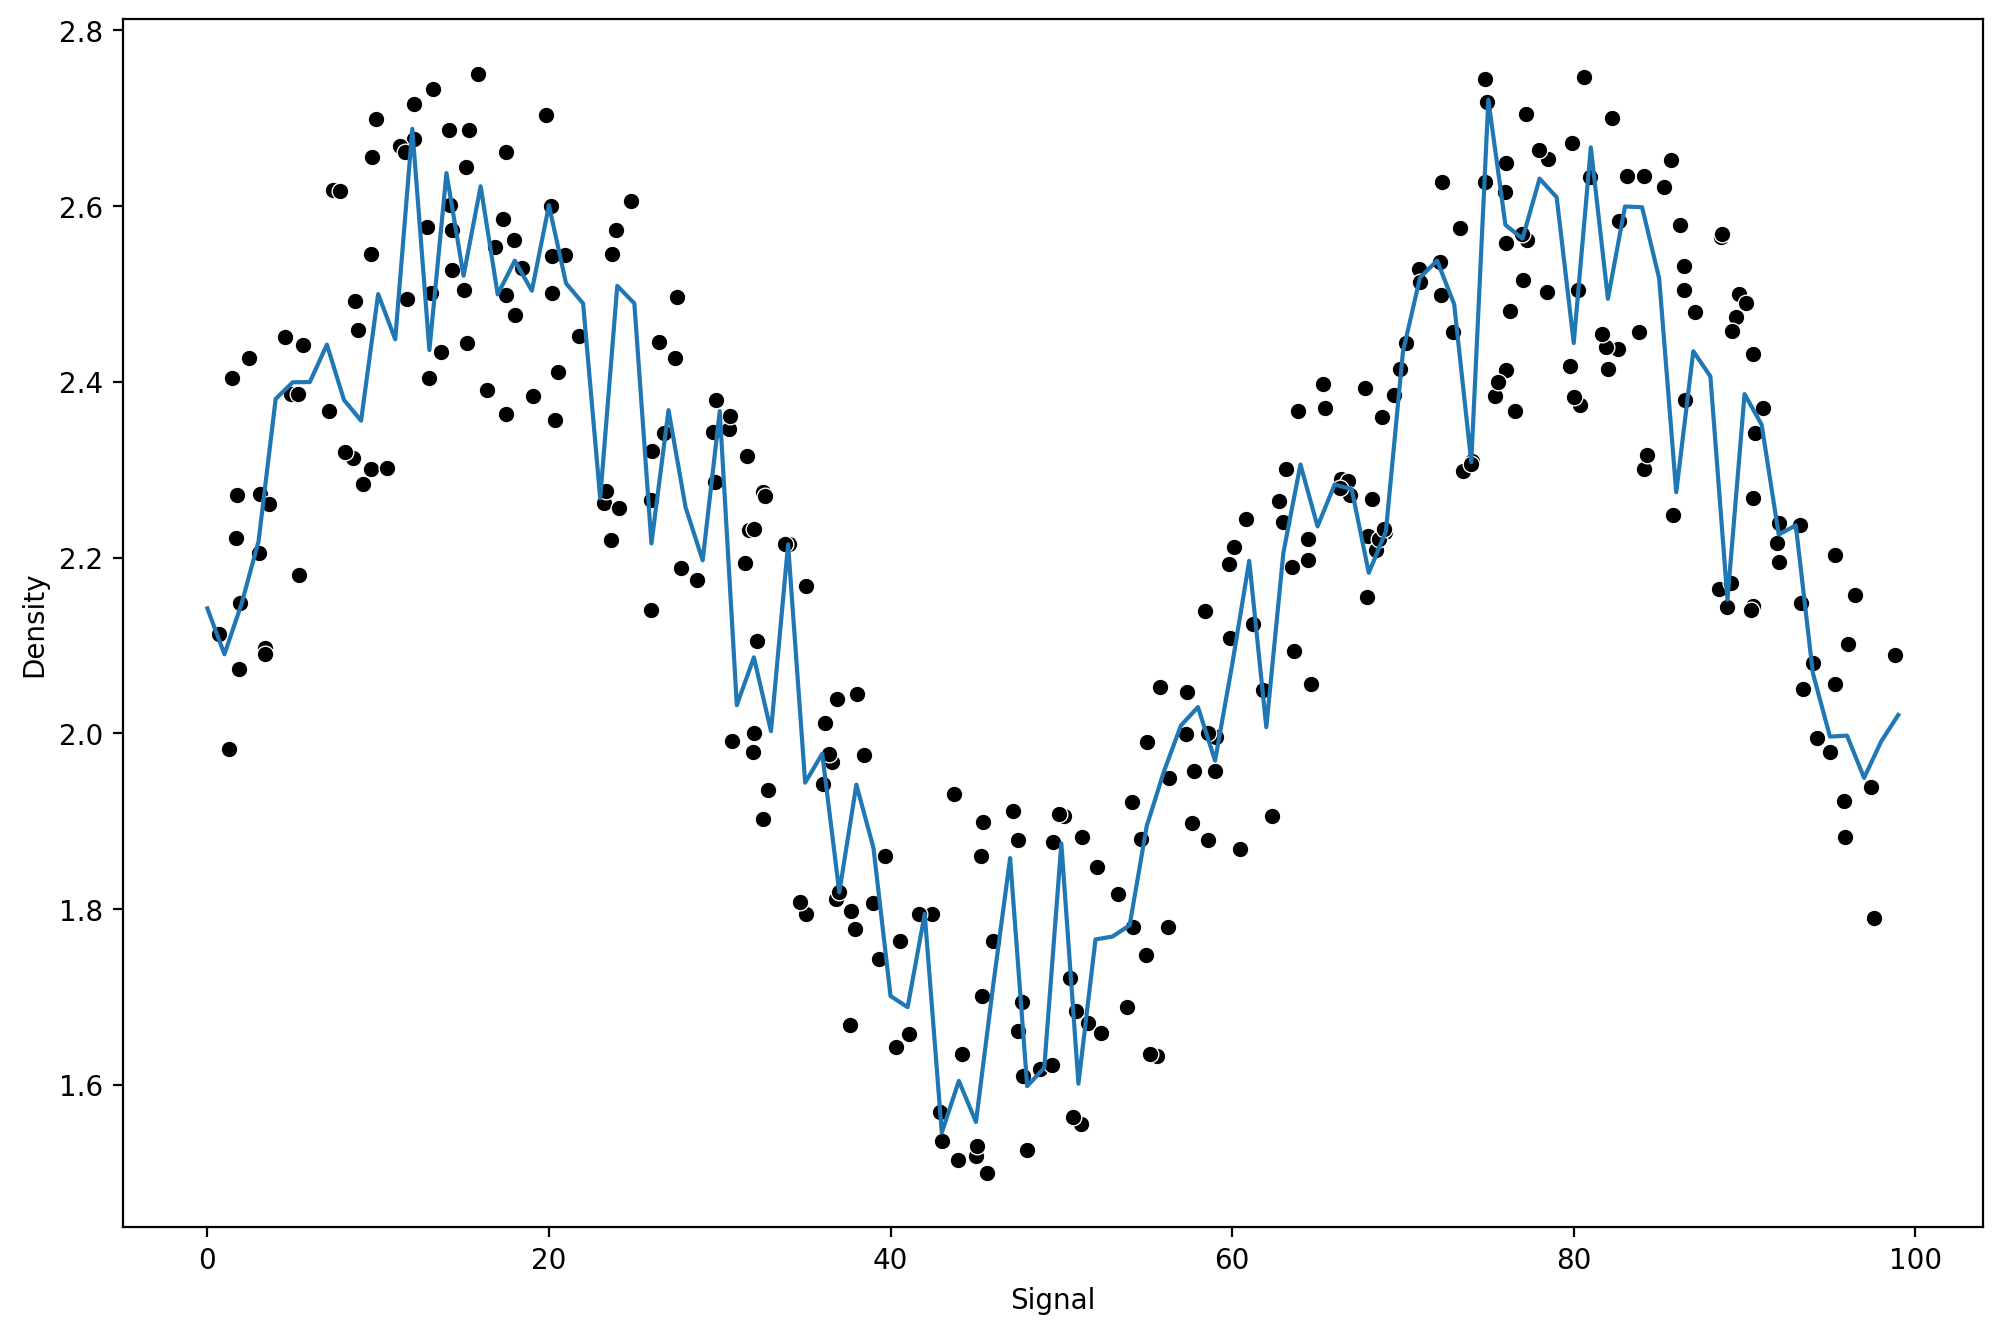

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10)
run_model(rfr,X_train,y_train,X_test,y_test)

## GradientBoostingRegressor and AdaboostingRegressor

MAE: 0.11306728397763649
RMSE: 0.11306728397763649


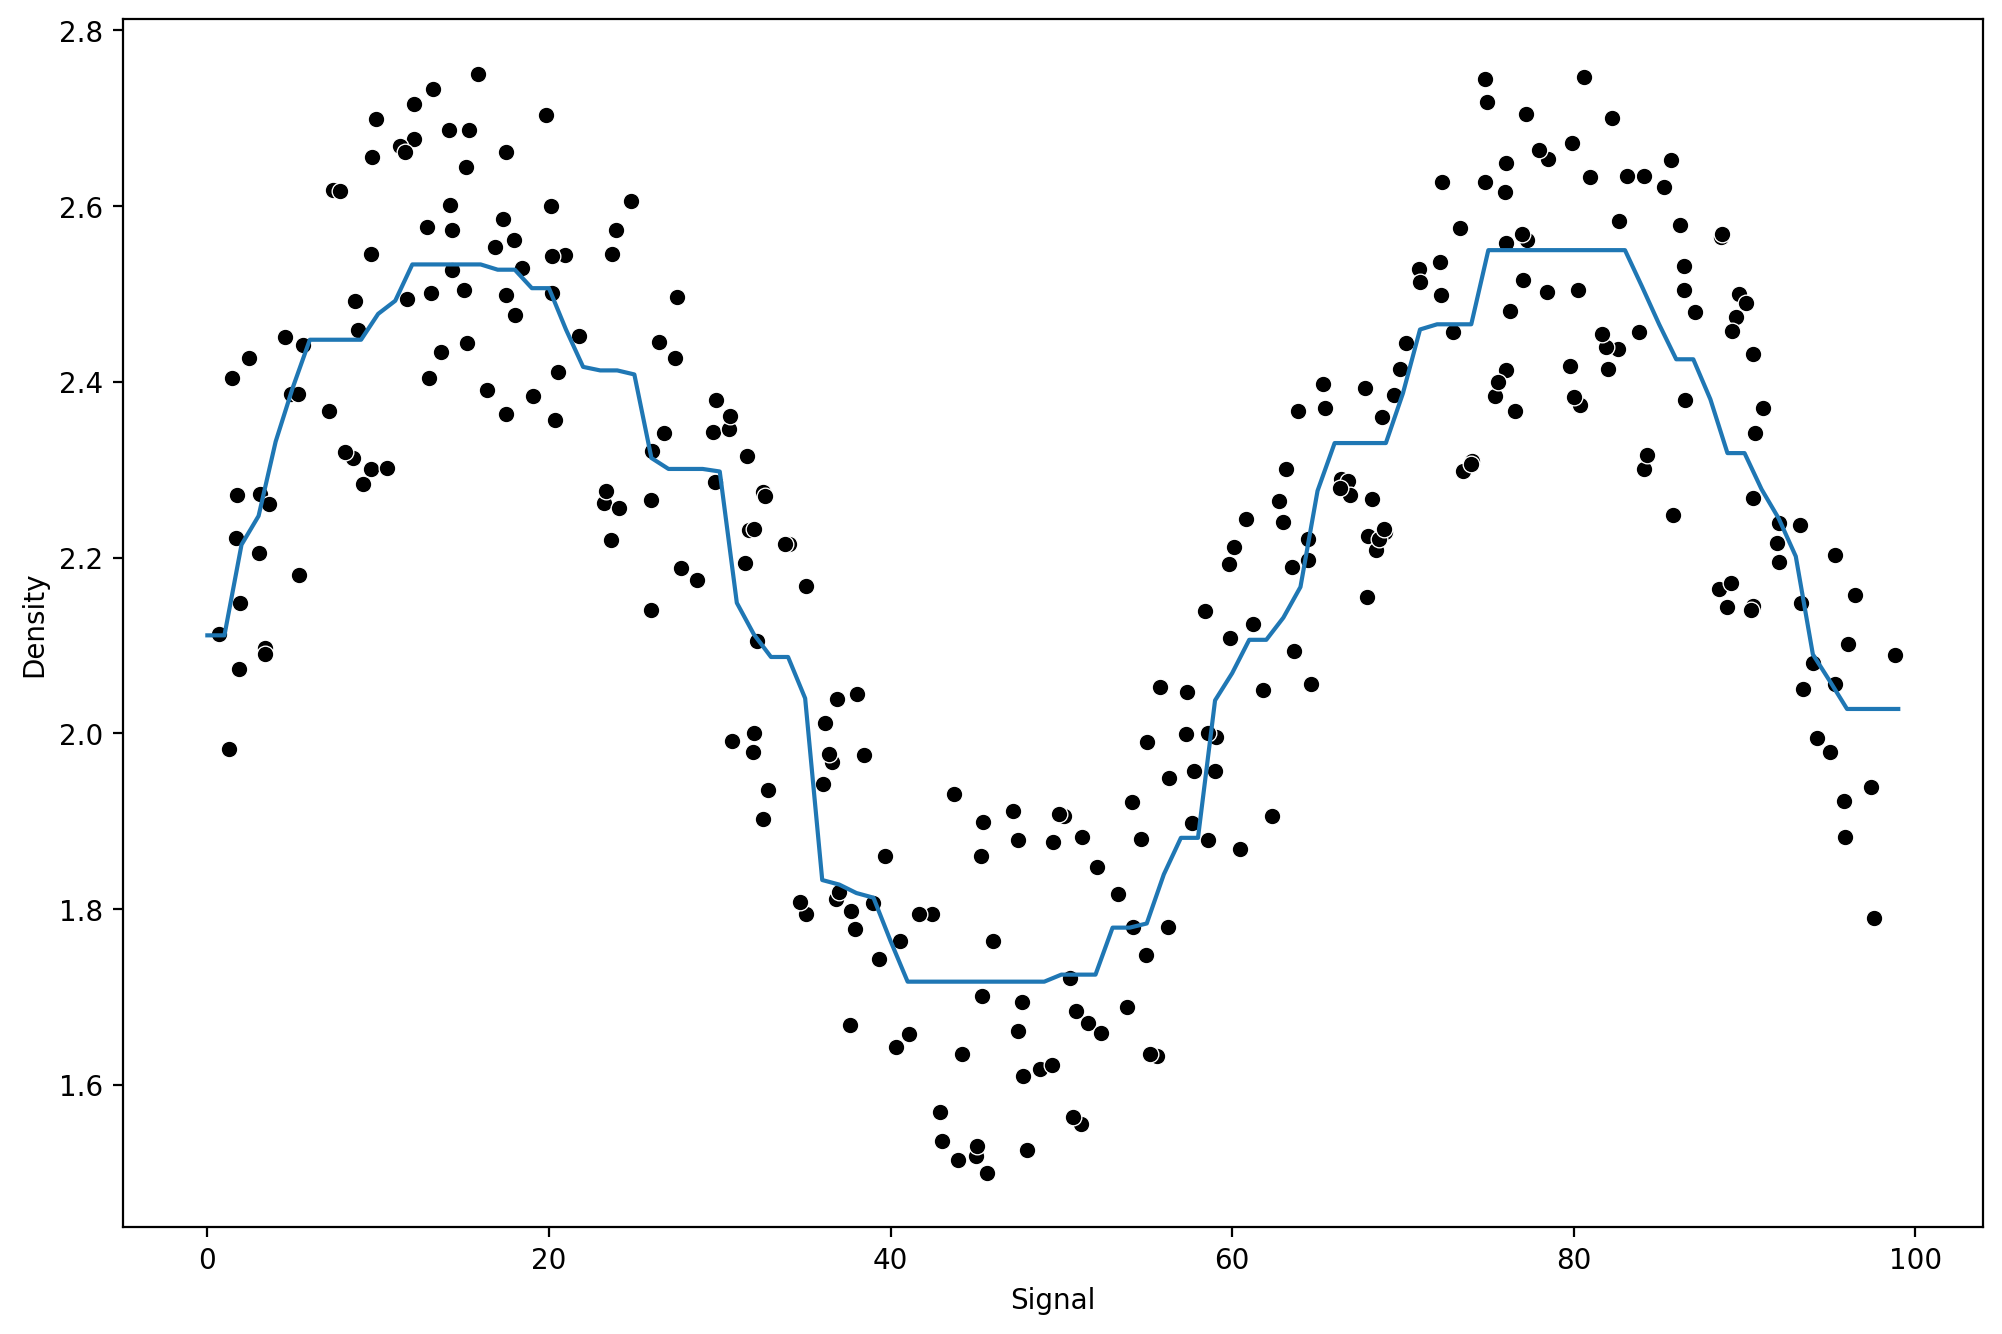

In [59]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.11318284854800689
RMSE: 0.11318284854800689


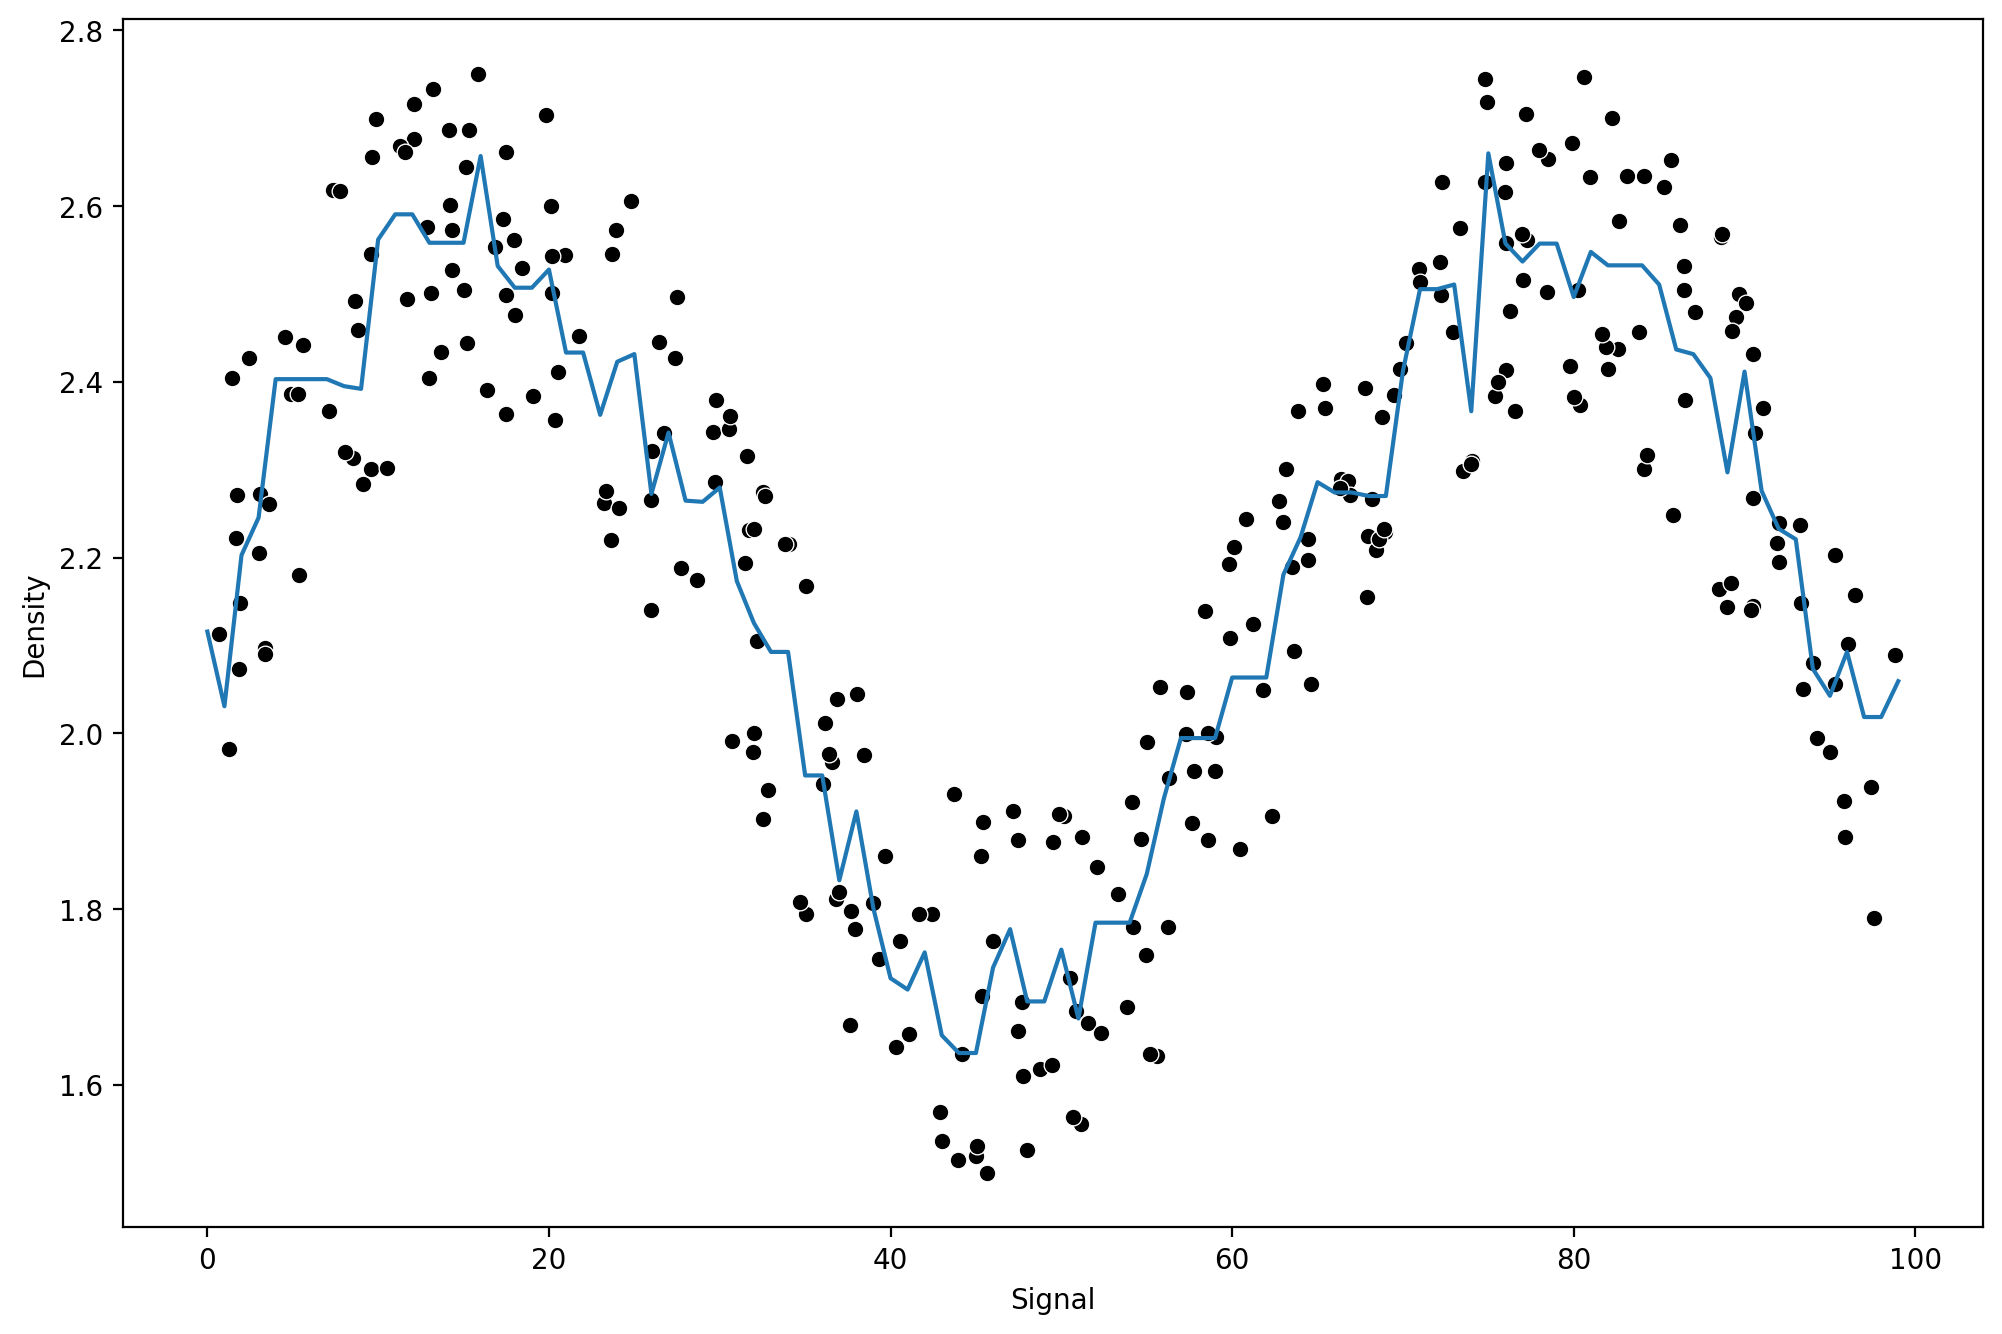

In [60]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)